# Tarea 4 IMT2210-Algebra lineal para ciencias de datos

Para esta tarea nos enfocaremos en problemas reales donde se aplica la materia que hemos aprendido hasta ahora en el curso.  

## puentes en celosía  
<img src="https://i.redd.it/9zsjh5exod291.png" alt="Meme" width="500"/>


# Contexto
Los puentes de celosía son estructuras esenciales en la ingeniería civil y han sido utilizados durante siglos debido a su eficiencia y capacidad para soportar grandes cargas. Un puente de celosía se compone de un entramado de barras conectadas en sus extremos mediante nodos, formando una serie de triángulos. Esta configuración triangular es fundamental ya que proporciona estabilidad estructural y distribuye las cargas de manera uniforme a lo largo del puente.

En el análisis estructural, especialmente en el diseño y evaluación de puentes de celosía, es crucial comprender cómo las fuerzas aplicadas afectan a la estructura. Aquí es donde entra en juego el concepto de matrices de rigidez. Las matrices de rigidez son herramientas matemáticas que nos permiten modelar la relación entre las fuerzas aplicadas a una estructura y las deformaciones resultantes. A través de estas matrices, podemos calcular los desplazamientos en los nodos del puente y, a partir de estos desplazamientos, determinar las fuerzas internas en cada barra del puente.

# Método matricial de la rigidez

### Matriz de rigidez de un elemento local

Comenzaremos con la derivación de cómo funciona la matriz de rigidez.

Toda la idea detrás del método matricial de la rigidez comienza con unos conceptos muy básicos de la física. El primero es la ley de Hooke, que dice que el cambio de largo de un elemento en tensión está en proporción directa con la fuerza que se está ejerciendo sobre el elemento. Y la constante de proporcionalidad, \( k \), entre la fuerza y el largo del elemento en cuestión, se le llama rigidez del elemento.
$$F = k \delta$$

Para comenzar, contemplaremos un ejemplo simple donde veremos cómo se ve esta ecuación en un solo elemento estructural, una viga rígida.
![viga rígida](https://www.engineeringskills.com/_next/image?url=%2Fimages%2Fposts%2Fdirect-stiffness-method%2FAxially-loaded-bar.jpg&w=750&q=75)

Nuestra viga está sometida a dos fuerzas, una en cada extremo o nodo, $F_{x,1}$ y $F_{x,2}$. Según la ley de Hooke, sabemos que estas fuerzas inducirán desplazamientos, $u_{x,1}$ y $u_{x,2}$ en los nodos 1 y 2 respectivamente. Nuestra tarea ahora es obtener una expresión similar a la ley de Hooke que relacione las fuerzas $F_{x,1}$ y $F_{x,2}$ con los desplazamientos $u_{x,1}$ y $u_{x,2}$.

Obtener la expresión que representa esto es simple ya que sabemos que la rigidez de un elemento se expresa como $\frac{EA}{L}$ donde $L$ es el largo del elemento, $A$ es el área de la sección transversal y $E$ es el módulo de Young o módulo de elasticidad.  
Usando al ecuación $F = k \delta$, podemos reemplazar $k$ con $\frac{EA}{L}$ y $\delta$ por el despazamiento de el nodo.

Entonces, para el nodo 1:

$$
\begin{align}
F_{x,1} &= \frac{EA}{L} (u_{x,1} - u_{x,2}) \\
F_{x,1} &= \frac{EA}{L} u_{x,1} - \frac{EA}{L} u_{x,2}
\end{align}
$$

Para el nodo 2:

$$
\begin{align}
F_{x,2} &= \frac{EA}{L} (u_{x,2} - u_{x,1}) \\
F_{x,2} &= -\frac{EA}{L} u_{x,1} + \frac{EA}{L} u_{x,2}
\end{align}
$$

Finalmente, si combinamos las dos ecuaciones en una y las representamos de forma matricial obtenemos:

$$
\begin{Bmatrix}
F_{x,1} \\
F_{x,2}
\end{Bmatrix}
= \frac{EA}{L}
\begin{bmatrix}
1 & -1 \\
-1 & 1
\end{bmatrix}
\begin{Bmatrix}
u_{x,1} \\
u_{x,2}
\end{Bmatrix}
$$


Observamos que el elemento de rigidez que relaciona la fuerza con el desplazamiento ha sido reemplazado por una __¡matriz!__. Esta se conoce como la ___Matriz de Rigidez del Elemento Local___, $[K_L]$ y relaciona las fuerzas en cada nodo, ${F_L}$ con los desplazamientos nodales correspondientes, ${u_L}$. Podemos ver a partir de la matriz de rigidez que las fuerzas desarrolladas en cada nodo tendrán igual magnitud y serán opuestas en dirección, confirmando el equilibrio estático de la barra. El elemento de barra es típicamente parte de una estructura más grande y, como tal, el desplazamiento en cada nodo será generalmente diferente, dando lugar a un alargamiento o acortamiento de la barra. La matriz de rigidez del elemento local es la ___unidad fundamental___ del análisis por método matricial de la rigidez, y es literalmente el bloque de construcción básico que usamos para ensamblar nuestro modelo de la estructura. Para elementos estructurales más sofisticados, esta matriz se vuelve más grande y compleja, pero tengan en cuenta que siempre se trata de relacionar las acciones (fuerzas, momentos) aplicadas a un elemento, con los desplazamientos y rotaciones correspondientes.


Como vimos al principio, esta técnica se basa en dos ideas básicas: la ley de Hooke, que ya hemos cubierto, y esta siguiente. Envuelto en la ecuación matricial estaba la relación fuerza-desplazamiento para ambos nodos del miembro. Pero recuerda que dijimos que este miembro fue 'extraído' de una estructura más grande. Y por lo tanto, podría fácilmente ser el caso que el nodo 2 tenga 2, 3 o _n_ otros miembros conectados a él. Cada uno de esos miembros también tendrá una relación fuerza-desplazamiento que debe ser obedecida.

Entonces, para resolver el desplazamiento del nodo 2, necesitamos considerar todos los miembros que se encuentran en ese nodo y obedecer simultáneamente todas sus relaciones individuales fuerza-desplazamiento. Matemáticamente, esto corresponde a resolver ecuaciones simultáneas para el valor del desplazamiento en el nodo 2 que satisfaga a todos los miembros que se conectan a este nodo. Si puedes comprender este concepto, entiendes el método matricial de la rigidez, todo lo demás son solo detalles de implementación.

Para implementar este método en la práctica, primero construimos una gran matriz para representar toda la estructura, llamamos a esto la ___Matriz de Rigidez de la Estructura Principal___. Aunque esta es una matriz mucho más grande, aún solo relaciona los desplazamientos nodales y las fuerzas nodales... pero para toda la estructura en lugar de un solo miembro. Para hacer esto, combinamos las matrices de rigidez de los elementos de tal manera que todos los miembros que contribuyen a cada nodo se suman en la misma ubicación en la matriz de rigidez de la estructura general. De esta manera, terminamos con un gran conjunto de ecuaciones simultáneas (elegantemente empaquetadas en una ecuación matricial) que modela el comportamiento fuerza-desplazamiento de la estructura. Luego, solo es cuestión de resolver estas ecuaciones para los desplazamientos estructurales desconocidos utilizando las técnicas habituales (es decir, una computadora) para resolver ecuaciones matriciales.


Para entender este concepto primero comenzaremos con un ejemplo.  
Tomemos la siguiente estructura de celosías. En esta estructura tenemos 4 nodos numerados, y 3 vigas (elementos) nombrados A, B y C.  
<img src="https://www.engineeringskills.com/_next/image?url=%2Fimages%2Fposts%2Fdirect-stiffness-method%2FTruss.jpg&w=640&q=75" alt="Truss Structure" width="400"/>  
El primer paso es identificar los posibles desplazamientos que cada nodo puede tener. A estos los llamaremos grados de libertad.  
<img src="https://www.engineeringskills.com/_next/image?url=%2Fimages%2Fposts%2Fdirect-stiffness-method%2FTruss-degrees-of-freedom.jpg&w=640&q=75" alt="Degrees of Freedom" width="400"/>  
  
# Matriz de rigidez global de un elemento
Para poder combinar nuestras matrices de rigidez de los elementos, primero debemos tener en cuenta el hecho de que todos están orientados en diferentes ángulos. Esto significa que una fuerza axial para el miembro A, por ejemplo, no puede actualmente sumarse directamente a una fuerza axial del miembro B ya que están orientados en diferentes ángulos. Por lo tanto, necesitamos realizar una transformación que mapee las fuerzas y desplazamientos de cada miembro en un ___marco de referencia global común___. Para esto utilizamos una matriz de transformación, $[T]$. Ahora, esto puede derivarse fácilmente, pero en interés de la brevedad, por ahora simplemente establecemos la siguiente relación entre las coordenadas en un marco de referencia local del miembro y las coordenadas correspondientes en un marco de referencia global de la estructura:
$$
\begin{Bmatrix}
u_{x,L,1} \\
u_{x,L,2}
\end{Bmatrix}
=\begin{bmatrix}
\cos\theta & \sin\theta & 0 & 0 \\
0 & 0 & \cos\theta & \sin\theta
\end{bmatrix}
\begin{Bmatrix}
u_{x,G,1} \\
u_{y,G,1} \\
u_{x,G,2} \\
u_{y,G,2}
\end{Bmatrix}
$$  

Esta ecuación traduce los desplazamientos que sufre un miembro en cada uno de sus nodos, dentro del marco de referencia global, al desplazamiento equivalente en un marco de referencia local y axial, paralelo al eje (¡¡Literalmente es una ___transformación lineal___!!). Donde $u_{x,L,1}$ y $u_{x,L,2}$ son los desplazamientos axiales locales en los nodos 1 y 2. Podemos resumir esto como $\{u_L\} = [T]\{u_G\}$. La matriz de transformación (___!Lineal¡___) $[T]$ actúa como un puente entre las coordenadas locales y globales, siempre y cuando utilicemos un método para determinar el ángulo de orientación del miembro en cuestión, $\theta$, y lo apliquemos consistentemente a todos los miembros. Podemos usar la misma técnica para conectar las fuerzas en un marco de referencia local del elemento $\{F_L\}$ y sus valores $\{F_G\}$ en el marco de referencia global común (para todos los miembros).
$$
\begin{Bmatrix}
F_{x,G,1} \\
F_{y,G,1} \\
F_{x,G,2} \\
F_{y,G,2}
\end{Bmatrix}
=\begin{bmatrix}
\cos\theta & 0 \\
\sin\theta & 0 \\
0          & \cos\theta \\
0          & \sin\theta
\end{bmatrix}
\begin{Bmatrix}
F_{x,L,1} \\
F_{x,L,2}
\end{Bmatrix}
$$  


Podemos resumir esta relación como $\{F_G\} = [T]^T \{F_L\}$. Ahora que tenemos el vínculo entre:
- Fuerzas en un marco de referencia local y global
- Desplazamientos en un marco de referencia local y global

necesitamos finalmente vincular las fuerzas en un marco de referencia global con los desplazamientos en un marco de referencia global. Consideremos la ecuación que relaciona la fuerza y el desplazamiento en el elemento local,
$$
\{F_L\} = \frac{EA}{L} \begin{bmatrix}
1 & -1 \\
-1 & 1
\end{bmatrix} \{u_L\}
$$

Esta relación ahora se puede transformar al marco de referencia global utilizando la matriz de transformación \([T]\).

$$
\{F_L\} = [T]^T \frac{EA}{L} \begin{bmatrix}
1 & -1 \\
-1 & 1
\end{bmatrix} \{u_L\}
$$

Entonces, al sustituir $\{u_L\} = [T] \{u_G\}$, obtenemos

$$
\{F_G\} = [T]^T \frac{EA}{L} \begin{bmatrix}
1 & -1 \\
-1 & 1
\end{bmatrix} [T] \{u_G\}
$$

Esto nos da la relación entre fuerzas y desplazamientos en el marco de referencia global.

Por lo tanto, podemos identificar $[T]^T [K_L] [T]$ como la Matriz de Rigidez del Elemento Global, $[K_G]$, que relaciona las fuerzas definidas en un marco de referencia global con los desplazamientos también definidos en un marco de referencia global. Para mayor claridad, definamos $c = \cos\theta$ y $s = \sin\theta$. Después de realizar la multiplicación de matrices, $[T]^T [K_L] [T]$, obtenemos $[K_G]$ como,

$$
[K_G] = [T]^T [K_L] [T] = \frac{EA}{L}
\begin{bmatrix}
c^2 & cs & -c^2 & -cs \\
cs & s^2 & -cs & -s^2 \\
-c^2 & -cs & c^2 & cs \\
-cs & -s^2 & cs & s^2
\end{bmatrix} \quad (13)
$$

Ahora podemos calcular una ___matriz de rigidez de elemento global___ para cada elemento de nuestra estructura que codifica la orientación del miembro. Una vez calculadas, estas se pueden combinar directamente para construir la ___matriz de rigidez de la estructura principal___.


# Matriz de rigidez de la estructura principal

Acá veremos cómo se construye la matriz de rigidez de la estructura completa, aplicando lo que hemos visto hasta ahora en la tarea y construyendo una matriz mucho más grande que es capaz de codificar toda la información que queremos obtener dado los desplazamientos o fuerzas conocidas.

### Paso 1: Dividir las matrices de rigidez de los elementos en cuadrantes

Cada matriz de rigidez de un elemento es de $4 \times 4$, por lo que dividiremos cada una en cuadrantes de $2 \times 2$. Así, el elemento A, por ejemplo, se dividiría de la siguiente manera:

$$
[K_A] = \frac{EA}{L}
\begin{bmatrix}
c^2 & cs & -c^2 & -cs \\
cs & s^2 & -cs & -s^2 \\
-c^2 & -cs & c^2 & cs \\
-cs & -s^2 & cs & s^2
\end{bmatrix}
= \frac{EA}{L}
\begin{bmatrix}
K_{A,11} & K_{A,12} \\
K_{A,21} & K_{A,22}
\end{bmatrix}
$$

donde cada $K_{A,ij}$ es una submatriz de $2 \times 2$.  
Además, como se mencionó al comienzo cuando desarrollamos la matriz de rigidez de un elemento local, las fuerzas generadas en cada nodo y en cada grado de libertad serán opuestas y de igual magnitud, por lo que la viga permanece estática, que es lo que se esperaba dado que estamos analizando estructuras rígidas y no móviles.

Donde,

$$
[K_{A,12}] = EA \begin{bmatrix}
c^2 & cs \\
cs & s^2
\end{bmatrix} \quad
$$

$$
[K_{A,21}] = EA \begin{bmatrix}
-c^2 & -cs \\
-cs & -s^2
\end{bmatrix} \quad
$$

$$
[K_{A,11}] = EA \begin{bmatrix}
-c^2 & -cs \\
-cs & -s^2
\end{bmatrix} \quad
$$

$$
[K_{A,22}] = EA \begin{bmatrix}
c^2 & cs  \\
cs & s^2
\end{bmatrix} \quad
$$

El mismo proceso de subdivisión se repite para cada miembro de nuestra estructura. Veremos en breve qué representa cada cuadrante.


### Paso 2: Configurar la plantilla de la matriz de rigidez principal

Ahora podemos configurar una plantilla para la matriz de rigidez principal que hará que sea fácil ver dónde se insertan los cuadrantes de nuestras matrices de rigidez de los elementos. Dado que nuestra estructura tiene 4 nodos, nuestra plantilla será de $4 \times 4$, por ahora podemos llenarla con marcadores de posición de la siguiente manera:

$$
[K_P] =
\begin{bmatrix}
k_{11} & k_{12} & k_{13} & k_{14} \\
k_{21} & k_{22} & k_{23} & k_{24} \\
k_{31} & k_{32} & k_{33} & k_{34} \\
k_{41} & k_{42} & k_{43} & k_{44}
\end{bmatrix} \quad (22)
$$

Cada elemento en la plantilla anterior representa una matriz de $2 \times 2$, por lo que esta plantilla en realidad representa una matriz de rigidez de estructura principal de $8 \times 8$ cuando se llena.


### Paso 3: Llenar la plantilla con los cuadrantes de las matrices de rigidez de los elementos

Ahora podemos tomar los cuadrantes de las matrices de rigidez de los elementos e insertarlos en las posiciones relevantes en la plantilla de la matriz de rigidez principal. Para cada miembro, identifique los números de nodo en cada extremo del miembro, esto define las filas y columnas en las que se ajustan los cuadrantes de ese miembro. Más específicamente, los cuadrantes de la matriz de rigidez del elemento se posicionan en la intersección de las filas y columnas identificadas por los números de nodo. Consideremos el miembro A como ejemplo; une los nodos 1 y 4, y por lo tanto contribuye a la matriz de rigidez principal de la siguiente manera:

![plantiza_mrp](https://www.engineeringskills.com/_next/image?url=%2Fimages%2Fposts%2Fdirect-stiffness-method%2FStiffness-member-A-1.jpg&w=750&q=75)

Seguimos el mismo proceso exacto para agregar todas las matrices de rigidez de los elementos a la matriz de rigidez principal. Observe que cada vez que agregamos la contribución de otro miembro, terminamos agregando al elemento $k_{44}$. Basado en nuestra discusión anterior del concepto del método de rigidez directa, esto tiene sentido ya que todos los miembros se encuentran en el nodo 4 y por lo tanto contribuyen al comportamiento de ese nodo.

Como habíamos dicho más arriba, ahora hablaremos de qué representa cada cuadrante y por qué se ordena de la manera que se ordena en la matriz de rigidez principal. Como bien dice arriba, cada elemento $k_{i,j}$ en la ___matriz de rigidez principal___, representa un cuadrante de una ___matriz de rigidez global de un elemento___ específico. Este elemento es el que conecta los nodos de la fila y la columna donde debe ir el cuadrante respectivo. Si volvemos arriba donde definimos la matriz de rigidez global de cada elemento, vemos que esta actúa como una transformación lineal (al igual que todas las matrices que hemos visto hasta ahora en la tarea) y justamente transforma un vector perteneciente a $R^4$ en otro vector perteneciente a $R^4$, donde el primer vector representa los desplazamientos, en términos globales que sufre cada nodo, respecto a cada grado de libertad que tiene, y el segundo vector es el vector que describe las fuerzas, en términos globales, que sufre cada nodo, también para cada grado de libertad que tiene. Veámoslo en más detalle:

De

$$
[K_A] = \frac{EA}{L}
\begin{bmatrix}
c^2 & cs & -c^2 & -cs \\
cs & s^2 & -cs & -s^2 \\
-c^2 & -cs & c^2 & cs \\
-cs & -s^2 & cs & s^2
\end{bmatrix}
= \frac{EA}{L}
\begin{bmatrix}
K_{A,11} & K_{A,12} \\
K_{A,21} & K_{A,22}
\end{bmatrix}
$$

donde,

$$
\begin{align}
[K_{A,12}] &= \frac{EA}{L} \begin{bmatrix}
c^2 & cs \\
cs & s^2
\end{bmatrix} \\
[K_{A,21}] &= \frac{EA}{L} \begin{bmatrix}
-c^2 & -cs \\
-cs & -s^2
\end{bmatrix} \\
[K_{A,11}] &= \frac{EA}{L} \begin{bmatrix}
-c^2 & -cs \\
-cs & -s^2
\end{bmatrix} \\
[K_{A,22}] &= \frac{EA}{L} \begin{bmatrix}
c^2 & cs  \\
cs & s^2
\end{bmatrix}
\end{align}
$$

se desprende que cada cuadrante representa la fracción de la suma de fuerzas totales que aporta cada deformación en el grado de libertad $x$ e $y$ desde el nodo $i$ al nodo $j$, donde $i$ es nodo de inicio y $j$ es el nodo de llegada. Es decir, el primer cuadrante nos da la parte que actúa sobre el primer nodo, desde él mismo, mientras que el segundo cuadrante, nos da la parte de la fuerza que actúa sobre el primer nodo desde el segundo nodo. Luego lo mismo pasa con el tercer y cuarto cuadrante, donde el tercer cuadrante representa la transformación requerida para encontrar la fracción de la fuerza que actúa sobre el segundo nodo, que proviene del primer nodo, y el cuarto cuadrante nos da la transformación requerida para encontrar la otra fracción de la fuerza que actúa sobre el segundo nodo, que proviene de sí mismo.

Con este análisis podemos encontrar la posición en la ___matriz de rigidez de la estructura principal___ de cualquier cuadrante de cada ___matriz de rigidez global de un elemento___, donde el cuadrante tiene su posición dada por el nodo de inicio y de final que representan la viga en cuestión. Notar que como $K_P$, nuestra matriz de rigidez de la estructura principal está compuesta por más matrices pequeñas dentro de ella, su tamaño en realidad sería el doble que el que se calcula al comienzo como se ve en,

$$
[K_P] =
\begin{bmatrix}
k_{11} & k_{12} & k_{13} & k_{14} \\
k_{21} & k_{22} & k_{23} & k_{24} \\
k_{31} & k_{32} & k_{33} & k_{34} \\
k_{41} & k_{42} & k_{43} & k_{44}
\end{bmatrix}
$$

donde esta matriz en realidad representa una matriz de $8 \times 8$.

Antes de comenzar con el desarrollo propio de la tarea, los invito a leer esta [página](https://www.engineeringskills.com/posts/direct-stiffness-method) donde el autor desarrolla el ejemplo que usé en este notebook y muestra cómo va quedando la matriz y las operaciones que se pueden hacer usando este método.


# Preguntas
Ahora que hemos revisado toda la teoría detras de como se genera la matriz de rigidez para el analisis estructural, iremos a aplicar todo este nuevo conosimiento para analizar una estructura nueva.

## Parte a) preguntas teóricas

- identifique todas las transformaciones lineales en el contexto.
- identificar espacios de salida y llegada de cada transformación lineal.
- interpretacion fisica de cada coordenada de los vectores en los espacios de cada transformacion.

### Respuestas:

identifique todas las transformaciones lineales en el contexto:

En el primer ejemplo, la matriz KL produce una transformación lineal de R2 a R2, ya que el vector u_l que representa el movimiento tiene 2 componentes, al igual que el vector resultante de la transformación lineal (F_l), que tiene 2 componentes en el ejemplo. La matriz K_L representa la transformación lineal. Como se dijo, la interpretación física de los vectores de las coordenadas en u_l representan el desplazamiento axial de los nodos con respecto a la propia viga.

En la matriz de rigidez global de un elemento, luego del primer ejemplo, tenemos la ecuación {uL}=[T]{uG}, donde la matriz T es 2x4, y sabemos que el vector uG es de 4x1, con 4 coordenadas, así que la multiplicación (transformación lineal, en otras palabras), debe dar como resultado una matriz o vector de 2x1, que es uL, por lo que esta transformación lineal va de R4 a R2. La interpretación física de esto es que, para cada nodo ve una viga en específico, uG es el desplazamiento en los ejes coordenados para esa viga, en esos nodos en específico, pero al multiplicarse con la matriz T (que se compone de senos y cosenos para las rotaciones), se obtienen los desplazamientos axiales en cada nodo de cada viga, pero en el sistema local, esto es, con relación a la propia viga localmente. Lo que hace esta transformación lineal es una reducción de la dimensionalidad, toma un vector uG que representa el movimiento global, y lo "parsea" o "traduce" al movimiento local de esa viga.

En la ecuación {FG}=[T]T{FL} que, según la explicación, relaciona las fuerzas en un marco de referencia local y global con los desplazamientos en un marco de referencia local y global, es una transformación lineal que toma un vector en R2 que representa las fuerzas locales y los transforma, mediante la transpuesta de T, en un vector de R4, es decir, toma las fuerzas axiales (locales) de cada nodo de una viga, y las transforma en la fuerza ejercida en cada eje y dirección del sistema global, para cada nodo.

En la transformación lineal [KG​]=[T]T[KL​][T] se va de R4 a R4.

En la matriz final, la K_p, sabemos que es de 4x4 en apariencia, pero dado que cada espacio de la matriz representa una submatriz de 2x2, el tamaño debería ser de 8x8 en total.

# Parte b)
#### implementación de la teoría

In [106]:
# Deben instalar previamente las librerias de numpy y matplotlib para poder correr esta parte.
# Para esto pueden usar el comando `pip install matplotlib` y `pip install numpy` en la terminal y debiesen instalarse automáticamente
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Modelamiento de la estructura

![ejercisoi](estructura.png)

### Comenzaremos definiendo nuestra estructura y datos sobre las fuerzas ejercidas sobre ella, y las constantes que la describen.

In [107]:
# Datos de nuestra estructura
E = 200e9 # Modulo de elasticidad(Pa)
A = 0.005 # Area transversal de las vigas (m^2)

nodos = [] # Lista donde guardaremos nuestros nodos
vigas = [] # Lista donde guardaremos nuestras vigas

# Ubicaciones de nuestros nodos con el punto A como origen
nodos.append([0,0]) # A
nodos.append([3,3]) # B
nodos.append([3,0]) # C
nodos.append([6,3]) # D
nodos.append([6,0]) # E
nodos.append([9,3]) # F
nodos.append([9,0]) # G

# Nodos que unen las vigas
vigas.append([0,1]) # AB
vigas.append([0,2]) # AC
vigas.append([2,1]) # CB
vigas.append([1,3]) # BD
vigas.append([2,3]) # CD
vigas.append([2,4]) # CE
vigas.append([4,3]) # ED
vigas.append([3,5]) # DF
vigas.append([4,5]) # EF
vigas.append([4,6]) # EG
vigas.append([6,5]) # GF

nodos = np.array(nodos).astype(float)
vigas = np.array(vigas)

# Fuerzas aplicadas a la estructura
# Array de tuplas donde cada tupla representa la fuerza que se ejerce en el nodo respectivo, con la direccion y fuerza en el eje respectivo.
fuerzas_aplicadas = np.zeros_like(nodos).astype(int)
fuerzas_aplicadas[1,1] = -6e3 # En el nodo 1 (B) fijamos que hay una fuerza sobre el eje vertical (eje y) de -6KN
fuerzas_aplicadas[3,1] = -4e3 # En el nodo 3 (D) fijamos que hay una fuerza sobre el eje vertical (eje y) de -4KN
fuerzas_aplicadas[5,0] = 10e3 # En el nodo 5 (F) fijamos que hay una fuerza sobre el eje horizontal (eje x) de 10KN


# Desplazamientos de los nodos fijos
deformaciones_glf = [0,0,0,0] # Evidentemente queremos que los nodos fijos no tengan desplazamiento

# Condiciones de libertad de movimiento de cada nodo (0 = fijo, 1 = libre)
condiciones_gl = np.ones_like(nodos).astype(int) #array que contiene las condiciones sobre los grados de libertad de cada nodo.
condiciones_gl[0,:] = 0 # En el nodo 0 (A) fijamos que los grados de libertad en ambos ejes son iguales a 0 (fijos)
condiciones_gl[6,:] = 0 # En el nodo 6 (G) fijamos que los grados de libertad en ambos ejes son iguales a 0 (fijos)


In [108]:
#-----------------NO MODIFICAR----------------------
# Definiremos algunas variables globales para la implementación de las funciones
nn = len(nodos) # Numero de nodos
nv = len(vigas) # Numero de vigas
gl = 2 # Grados de libertad, en este caso estamos trabajando con dos direcciones de posible desplazamiento.
tgl = nn*gl # Total de grados de libertad, usado solo en la función incluida.


# Estructuras para el calculo de los angulos de cada elemento
d = nodos[vigas[:,1],:] - nodos[vigas[:,0],:] # Dimensiones de la barra en terminos del margen de referencia global
l = np.sqrt((d**2).sum(axis=1)) # Largo de la barra en terminos del marco de referencia global
angulos = np.arccos(d[:,0]/l)   # Angulo entre la barra y el eje X del marco de referencia global (angulo con el suelo)
#---------------------------------------------------

### Parte i) de programación

En esta parte deberá completar una función que tomará como input el numero de la viga, del 0 al 10, y el angulo de la viga con el eje horizontal, y deberá retornar la matriz de rigidez de esta viga, es decir,
$$
[K_G] = [T]^T [K_L] [T] = \frac{EA}{L}
\begin{bmatrix}
c^2 & cs & -c^2 & -cs \\
cs & s^2 & -cs & -s^2 \\
-c^2 & -cs & c^2 & cs \\
-cs & -s^2 & cs & s^2
\end{bmatrix} \quad (13)
$$
__Importante__, no agregar la constante de $AE$, y la división por $L$ ya está puesta en el return.

In [109]:
# Debe completar esta función.
# Input: el numero de viga del 0 al 10, en el orden en que se agregaron a la lista de vigas en la celda de arriba
# y el angulo de la viga correspondiente respecto al eje horizontal
# output esperado: una matriz de 4X4 construida usando la fórmula dada en el contexto.
#  c^2   cs   -c^2  -cs
#  cs    s^2  -cs   -s^2
# -c^2  -cs    c^2   cs
# -cs   -s^2   cs    s^2

# Matriz de rigidez global de un elemento
def matriz_rigidez_global_elemento(viga, angulo):
    mrge = np.ndarray([4,4])
    # Completar

    c = np.cos(angulo)
    s = np.sin(angulo)

    # Hay que rellnar los valores que se usan abajo, usando de base la matriz de la tarea:
    c2 = c**2
    cs = c * s
    s2 = s**2

    # Paso 3: Construir la matriz de 4x4 usando un array de numpy.
    # Llenamos la matriz exactamente como dice la fórmula.
    mrge = np.array([
        [ c2,  cs, -c2, -cs],
        [ cs,  s2, -cs, -s2],
        [-c2, -cs,  c2,  cs],
        [-cs, -s2,  cs,  s2]
    ])

    return mrge/l[viga] # mrge debe tener la forma detallada arriba

In [110]:
# Funcion auxiliar para visualizar las matrices de forma más clara
# Sientase libre de implementarla donde crea que sea necesario para su ayuda
def print_matrix(m):
    for row in m:
        print(list(np.around(row,2)))
    print()
    return

In [111]:
# Función para calcular la matriz de rigidez de la estructura completa.
# Es fundamental que la función de arriba esté bien definida para el correcto funcionamiento de esta función.
# NO MODIFICAR ESTA FUNCIÓN
# Si desea ver como se va armando la matriz de rigidez de la estructura principal, descomente las lineas dentro de la funcion.
def matriz_rigidez_estructura_principal():
    matriz_rigidez_estructura = np.zeros([tgl,tgl]) # Iniciamos una matriz vacía donde se irán agregando los cuadrantes correspondientes de cada matriz de rigidez global de un elemento.
    # print("comenzando calculo de matriz de rigidez de estructura principal...")
    # print_matrix(matriz_rigidez_estructura)
    for viga in range(len(vigas)):

        angulo = angulos[viga] # Angulo que forma la k-esima viga con el eje horizontal.
        mrge = matriz_rigidez_global_elemento(viga, angulo) # Matriz de rigidez global de un elementos, dividida por el largo de la viga que está describiendo

        aux = 2*vigas[viga,:] # Variable auxiliar para encontrar los indices dentro de la matriz de rigidez de la estructura donde se sumará cada elemento de la matriz de rigidez local de un elemento.
        indices = np.r_[aux[0]:aux[0]+2, aux[1]:aux[1]+2] # Indices en la matriz de rigidez de la estructura donde se sumará cada elemento de la matriz de rigidez local de un elemento.

        matriz_rigidez_estructura[np.ix_(indices,indices)] = matriz_rigidez_estructura[np.ix_(indices,indices)] + mrge

        # print(f"agregando viga {viga}...\n\
# matriz de rigidez global del elemento {viga} entre {vigas[viga]}, grados de libertad {indices}")
        # print_matrix(mrge)

        # print(f"matriz de rigidez de la estructura luego de agregar elemento {viga}")
        # print_matrix(matriz_rigidez_estructura)

    return matriz_rigidez_estructura*(A*E)

In [112]:
#calculo de fuerza sobre los nodos en cada grado de libertad del marco de referencia global
#retorna dos matrizes de 7X2 donde cada fila es un nodo, y cada columna representa un eje del marco de referencia global
#la matrizes contiene la deformacion, o despazamiento que sufre cada nodo al ser sometido a las fuerzas que definimos
#y la otra matriz contiene las fuerzas que son aplicadas sobre cada nodo en cada grado de libertad.
#NO MODIFICAR ESTA FUNCIÓN
def calculadora_fuerzas_desplazamientos(mrep):
    #los grados de libertad que están fijos y libres segun el dibujo de la estructura.
    gl_libres = condiciones_gl.flatten().nonzero()[0]
    gl_fijos  = (condiciones_gl.flatten() == 0).nonzero()[0]

    gl_libres = np.array(list(itertools.product(gl_libres,gl_libres)))
    gl_fijos  = np.array(list(itertools.product(gl_fijos,gl_fijos)))

    #arreglamos nuestra matriz para dejar una diagonal de unos excepto en las coordenadas de nodos fijos. Esto lo hacemos sobre una copia de mrep
    matriz_rigidez_libres = np.zeros_like(mrep)
    for i in gl_libres:
        matriz_rigidez_libres[i[0],i[1]] = mrep[i[0],i[1]]
    for i in gl_fijos:
        if i[0] == i[1]:
            matriz_rigidez_libres[i[0],i[1]] = 1


    vector_fuerzas_conocidas = fuerzas_aplicadas.flatten() #expresasmos las fuerzas conocidas como un vector de 14 entradas

    vector_deformaciones_globales = (1/(E*A))*np.matmul(np.linalg.inv(matriz_rigidez_libres), vector_fuerzas_conocidas) #calculamos las deformaciones globales

    vector_reacciones_globales = (E*A)*np.matmul(mrep, vector_deformaciones_globales) #calculamos las fuerzas globales

    vector_reacciones_globales = vector_reacciones_globales.reshape(nn, gl)

    fuerzas_internas_globales = np.concatenate((vector_reacciones_globales[vigas[:,0]], vector_reacciones_globales[vigas[:,1]]), axis=1)

    vector_transfirmacion = np.around(np.array((-np.cos(angulos), -np.sin(angulos), np.cos(angulos), np.sin(angulos))),2).T
    vector_internas_locales = E*A/l[:] * (vector_transfirmacion[:]*fuerzas_internas_globales[:]).sum(axis=1)


    return vector_reacciones_globales.reshape(nn, gl), vector_deformaciones_globales.reshape(nn, gl), vector_internas_locales.reshape(len(vigas),1)

In [113]:
# Función para gráficar la deformación de la estructura.
# color: color, sugerido ('red', 'grey')
# ls: estilo de linea, sugerido('--')
# lw: ancho de linea, sugerido(1)
# label: etiqueta, Utilice ('deformado', 'no deformado')
def plot(nodos, color, ls, lw, label):

    for i in range(len(vigas)):
        xi, xf = nodos[vigas[i,0],0], nodos[vigas[i,1],0]
        yi, yf = nodos[vigas[i,0],1], nodos[vigas[i,1],1]

        line, = plt.plot([xi, xf], [yi, yf], color=color, linestyle=ls, linewidth=lw)
    line.set_label(label)
    plt.legend(prop = {'size': 8})

Una vez definidas todas las funciones, ejecutelas de tal forma que pueda gráficar las estructuras sin deformación y con deformación, utilizando la función Plot definida en la celda de arriba. (Para gráficar la estructura deformada debe aplicar un escalamiento ya que los movimientos son tan pequeños que no se ven a primera vista sin escalarse)
Recomendaciones:
- Identifique que vectores y matrices va a necesitar para poder gráficar las estructuras.
- Fijese bien en las definiciones de cada función para entender bien que hay que entregarles y que nos retornan.
- Usando su conocimiento de la teoría detras de todo esto, identifique cual es el orden en que debe ejecutar las funciones para obtener el resultado final esperado.

Deformaciones (x, y):
[[ 0.00000000e+00  0.00000000e+00]
 [ 6.22842712e-14 -7.92548340e-14]
 [ 1.60000000e-14 -6.72548340e-14]
 [ 5.62842712e-14 -7.35979797e-14]
 [ 2.00000000e-14 -4.95979797e-14]
 [ 6.22842712e-14 -2.40000000e-14]
 [ 0.00000000e+00  0.00000000e+00]]


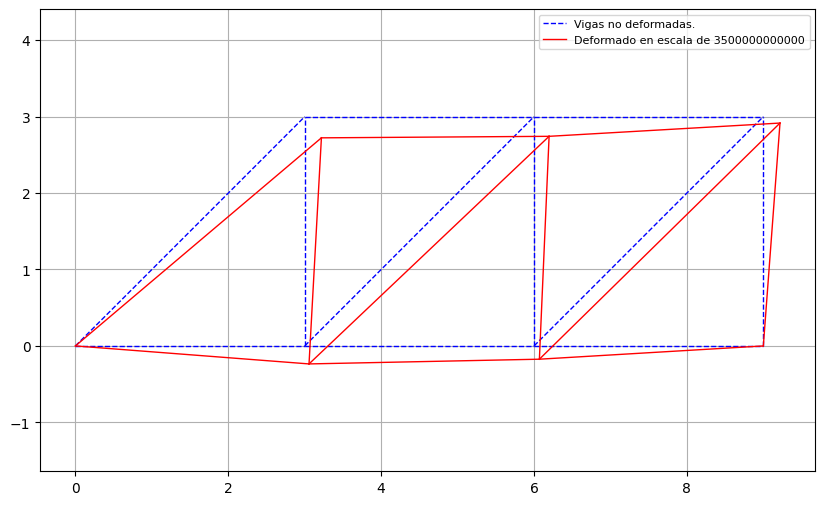

In [128]:
#Desarrollo

#Calculamos la matriz de rigidez con la función entregada
K_P = matriz_rigidez_estructura_principal()

# Calculamos las deformaciones, fuerzas globales y locales con la calculadora,
# pasandole la matriz de rigidez almacenada en la variable K_P al inicio de la celda, así
# resolvemos el sistema y encontramos los vectores necesarios:
fuerzas_globales, deformaciones, fuerzas_locales = calculadora_fuerzas_desplazamientos(K_P)

print("Deformaciones (x, y):")
print(deformaciones) # Verificamos si hay deformaciones para evitar errores.

escala = 3500000000000 # Tuve que aumentar mucho la escala para ver las deformaciones!
nodos_deformados = nodos + (deformaciones * escala)

plt.figure(figsize=(10, 6))

plot(nodos, color='blue', ls='--', lw=1, label='Vigas no deformadas.')
plot(nodos_deformados, color='red', ls='-', lw=1, label=f'Deformado en escala de {escala}')

plt.grid(True)
plt.axis('equal')
plt.show()

In [115]:
# EXTRA: Con esta función va a poder graficar las fuerzas internas a las que están sometidas las vigas de la estructura.
# Para usarla edben darle los nodos,y las fuerzas internas conseguidas antes de la funcion calculadora_fuerzas_desplazamientos()
def plot_forces(nodos, forces, ls, lw):

    fig, ax = plt.subplots(figsize=[12,8], ncols=1, sharey=True, sharex=True)
    norm = mpl.colors.Normalize(vmin=-1e7, vmax=1e7)
    cnorm = norm(forces)
    cmap = plt.get_cmap('seismic')(cnorm)

    for i in range(len(vigas)):
        xi, xf = nodos[vigas[i,0],0], nodos[vigas[i,1],0]
        yi, yf = nodos[vigas[i,0],1], nodos[vigas[i,1],1]

        ax.plot([xi,xf], [yi,yf], c=cmap[i], lw=4, )

    ax.set_title('fuerzas internas')
    fig.colorbar(mpl.cm.ScalarMappable(norm, plt.get_cmap('seismic')), ax=ax, ticks=None)


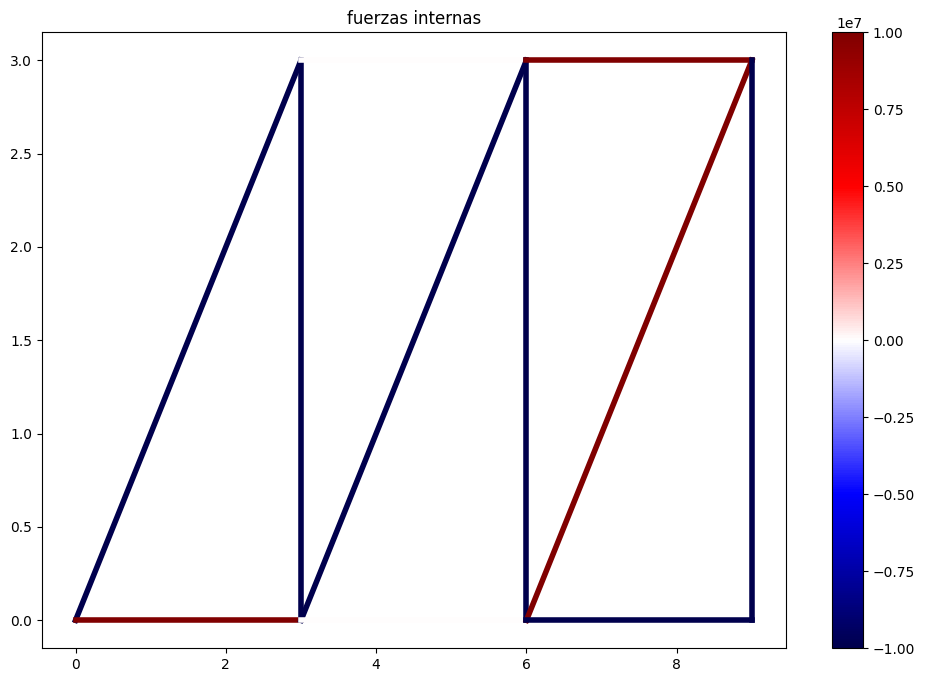

In [129]:
import matplotlib as mpl # No había visto esta forma de renombrarlo, tiene más sentido semántico.

# Volvemos a llamar a esta funcion en esta celda, para más orden.
K_P = matriz_rigidez_estructura_principal()

# No usaremos x e y al desempaquetar el output desde la calculadora, sólo las fuerzas internas.
x, y, vector_fuerzas_internas_locales = calculadora_fuerzas_desplazamientos(K_P)

# Con los nodos que nos da la tarea y las fuerzas calculadas, llamamos a la función
plot_forces(nodos, vector_fuerzas_internas_locales, ls=1, lw=1)
plt.show()